In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Asim, Mr. Adola",male,1601,B96 B98,S
freq,1,577,7,4,644


## Analyze by Pivoting Features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


__Observations:__

* There's a significant correlation (> 0.5) among Pclass=1 and Survived.
* Sex=female had very high survival rate at 74%
* Features: SibSp and Parch have zero correlation with certain values. Perhaps we can try to derive a feature or a set of features from these individual features.

## Analyze by Visualizing Data

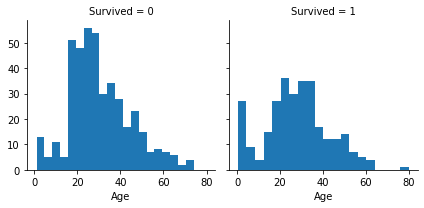

In [14]:
# check correlation between age and survived
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

__Observations:__

* Infants (Age <= 4) had high survival rate
* Oldest passengers (Age = 80) survived
* Large number of 15 - 25 years old did not survive
* Most passengers are 15 - 35 years old

__Decisions:__

* Consider feature "Age" in model training
* Handle "Age" null values
* Band "Age" groups

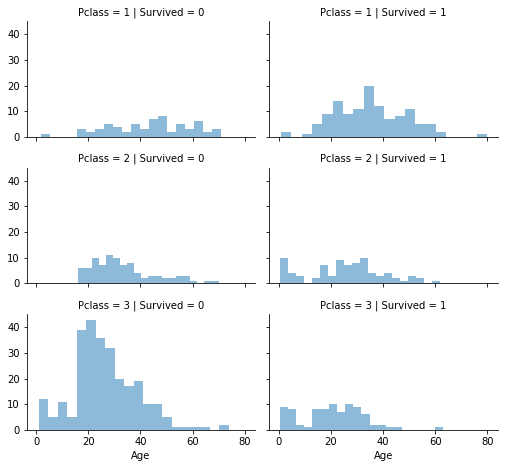

In [15]:
# check correlation between pclass and survived
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

__Observations:__
* Pclass=3 had the most passengers, however most did not survive.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived.
* Most passenger in Pclass=1 survived
* Pclass varied in terms of Age distribution of passengers.

__Decisions:__
* Include "Pclass" in model training

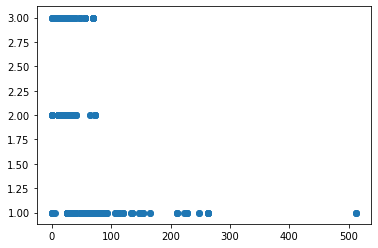

In [16]:
plt.scatter(train_df.Fare, train_df.Pclass)

In [17]:
train_df[(train_df.Fare < 10) & (train_df.Pclass==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S


In [18]:
train_df.Embarked.isna().sum()

2

d:\program files\python\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\program files\python\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


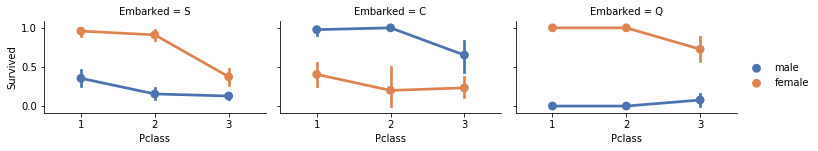

In [19]:
grid = sns.FacetGrid(train_df, col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

__Note:__
* Consider to drop "Ticket" because of high ratio of duplicates (unique: 681 out of 891 total in train_df)
* Consider to drop "Cabin" because it contains too many missing values.
* Consider to drop "Fare" because there's already a Pclass, plus Fare has a questionable values like 0.
* Consider to drop "Embarked" for now (there are some missing values, and seems not related to Survive), we will get back to this if our model needs further tuning.

## Wrangle the Data

In [20]:
# Drop data
train_mod_df = train_df.drop(['Name','Ticket', 'Cabin', 'Fare', 'Embarked'], axis=1)
test_mod_df = test_df.drop(['Name','Ticket', 'Cabin', 'Fare', 'Embarked'], axis=1)

In [21]:
# Converting Categorical feature
for df in [train_mod_df, test_mod_df]:
    df['Sex'] = df['Sex'].map({'male': 1, 'female':0})

In [22]:
train_mod_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


In [23]:
# Fill in missing age values with 0 (presuming they are a baby if they do not have a listed age)
train_mod_df.Age = train_mod_df.Age.fillna(0)
test_mod_df.Age = test_mod_df.Age.fillna(0)

train_mod_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


In [24]:
# Create new feature family size which combines SibSp and Parch
for df in [train_mod_df, test_mod_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # added +1 to count for itself

train_mod_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [25]:
for df in [train_mod_df, test_mod_df]:
    df['IsAlone'] = 0
    df.loc[df['FamilySize']==1, 'IsAlone'] = 1

train_mod_df[['FamilySize','IsAlone']].head()

,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


In [26]:
train_mod_df.drop(['Parch','SibSp','FamilySize'], axis=1, inplace=True)
test_mod_df.drop(['Parch','SibSp','FamilySize'], axis=1, inplace=True)

train_mod_df.head()

,PassengerId,Survived,Pclass,Sex,Age,IsAlone
0,1,0,3,1,22.0,0
1,2,1,1,0,38.0,0
2,3,1,3,0,26.0,1
3,4,1,1,0,35.0,0
4,5,0,3,1,35.0,1


In [27]:
test_mod_df.head()

,PassengerId,Pclass,Sex,Age,IsAlone
0,892,3,1,34.5,1
1,893,3,0,47.0,0
2,894,2,1,62.0,1
3,895,3,1,27.0,1
4,896,3,0,22.0,0


## Model, Predict and Solve

In [66]:
X = train_mod_df.drop(['PassengerId','Survived'], axis=1)
y = train_mod_df.Survived
X_predict = test_mod_df.drop('PassengerId', axis=1)

X.shape, y.shape, X_predict.shape

((891, 4), (891,), (418, 4))

In [67]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [68]:
seed = 8
test_size = 0.2
fold = 10
metric = "accuracy"

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=test_size, random_state=seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 4), (179, 4), (712,), (179,))

In [71]:
# hold different classifier models in single dictionary
models = {}
models['LogisticRegression'] = LogisticRegression(solver='lbfgs')
models['Perceptron'] = Perceptron()
models['SGDClassifier'] = SGDClassifier()
models['SVC'] = SVC(gamma='auto')
models['LinearSVC'] = LinearSVC()
models['RandomForestClassifier'] = RandomForestClassifier(n_estimators=150)
models['KNeighborsClassifier'] = KNeighborsClassifier()
models['GaussianNB'] = GaussianNB()
models['DecisionTreeClassifier'] = DecisionTreeClassifier()

In [72]:
model_results = []
model_names = []
model_result_means = []

for model_name in models:
    model = models[model_name]
    k_fold = KFold(n_splits=fold, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    model_result_means.append(results.mean())
    print('{}: {}'.format(model_name, round(results.mean(), 3)))

LogisticRegression: 0.795
Perceptron: 0.727
SGDClassifier: 0.697
SVC: 0.815
LinearSVC: 0.799
RandomForestClassifier: 0.808
KNeighborsClassifier: 0.787
GaussianNB: 0.792
DecisionTreeClassifier: 0.808


In [73]:
d = {'Model_Name':model_names, 'Score': model_result_means}

models_score = pd.DataFrame(d)
models_score.sort_values(by='Score', ascending=False)

,Model_Name,Score
3,SVC,0.814515
5,RandomForestClassifier,0.807629
8,DecisionTreeClassifier,0.807551
4,LinearSVC,0.799061
0,LogisticRegression,0.794757
7,GaussianNB,0.792077
6,KNeighborsClassifier,0.786502
1,Perceptron,0.727387
2,SGDClassifier,0.696792


We will use SVC and RandomForestClassifier as our test models for this problem

In [81]:
SVC_model = SVC(gamma='auto', random_state=seed)

In [82]:
SVC_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [83]:
SVC_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

In [90]:
SVC_model.score(X_test, y_test)

0.7877094972067039

In [85]:
RF_model = RandomForestClassifier(n_estimators=150)

In [86]:
RF_model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [87]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
RF_model.score(X_test, y_test)

0.7877094972067039

In [91]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma': ['auto']
              }]

model = SVC()
k_fold = KFold(n_splits=fold, random_state=seed)
gsc = GridSearchCV(model, param_grid, cv=k_fold, scoring=metric, return_train_score=True, error_score=np.nan)
SVC_grid_result = gsc.fit(X_train, y_train)

print('best {} using {}'.format(SVC_grid_result.best_score_, SVC_grid_result.best_params_))

best 0.8146067415730337 using {'gamma': 'auto', 'kernel': 'rbf'}


In [98]:
param_grid = [{'n_estimators': [80, 100, 125],
               'min_samples_leaf': [1, 3, 5],
               'min_samples_split': [4, 6, 8]
              }]

model = RandomForestClassifier(random_state=seed)
k_fold = KFold(n_splits=fold, random_state=seed)
gsc = GridSearchCV(model, param_grid, cv=k_fold, scoring=metric, return_train_score=True, error_score=np.nan)
RF_grid_result = gsc.fit(X_train, y_train)

print('best {} using {}'.format(RF_grid_result.best_score_, RF_grid_result.best_params_))

best 0.824438202247191 using {'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 80}


In [99]:
best_model = RandomForestClassifier(**RF_grid_result.best_params_, random_state=seed)

In [101]:
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [102]:
best_model.score(X_test, y_test)

0.7988826815642458

In [103]:
scaled_X_predict = scaler.transform(X_predict)

In [104]:
y_predict = best_model.predict(scaled_X_predict)

In [106]:
submission = pd.DataFrame({'PassengerId': test_mod_df['PassengerId'],
                           'Survived': y_predict
                          })

In [107]:
submission.to_csv('submission.csv', index=False)